Beautiful Soup is a Python library for pulling out ou scraping data of HTML and XML files.

### <font color = 'tomato'> Import packages


In [1]:
# import packages
import pandas as pd
from requests import get # alows us to get the content  (html) of webpage
from bs4 import BeautifulSoup as bs # store the content in beautifulsoup objet and sparse the code

### <font color = 'tomato'> Collect data over one page

In [2]:
# url
url = 'https://dakar-auto.com/senegal/voitures-4?&page=1'
# get the html code of the page using the get function requests
res = get(url)
# store the html code in a beautifulsoup objet with a html parser (a parser allows to easily navigate through the html code)
soup = bs(res.content, 'html.parser')
print(soup)


<!DOCTYPE html>

<html class="no-js" lang="fr-SN">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="fr" http-equiv="content-language"/>
<title>Voiture occasion ou neuve Sénégal - Achat et vente voiture occasion ou neuve , annonce gratuite - Dakar-Auto.com   - Page 1</title>
<meta content="FYo5KU8AIHZPWvujO_6041XfouWqt_ScJvfMH1afIEo" name="google-site-verification">
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="https://dakar-auto.com/senegal/voitures-4?&amp;page=1" rel="canonical"/>
<meta content="Expat, résident, professionnel, pour l'achat ou la vente de votre voiture d'occasion ou neuve au Sénégal, choisissez Dakar-Auto.com, site gratuit d'annonce automobile, moto et scooter.    Page 1" name="description">
<meta content="voitures, berlines, suv, Expat, résident, professionnel, pour l'achat ou la vente de votre voiture d'occasion ou neuve au Sénégal, choisissez Dakar-Auto.com, site gratuit d'annon

Fucntions that we will use :
find_all :  

1.   find_all : This method returns a result set of contents of all the tags matching with the argument tag provided.
2.   find : This method return the content of a specific tag.



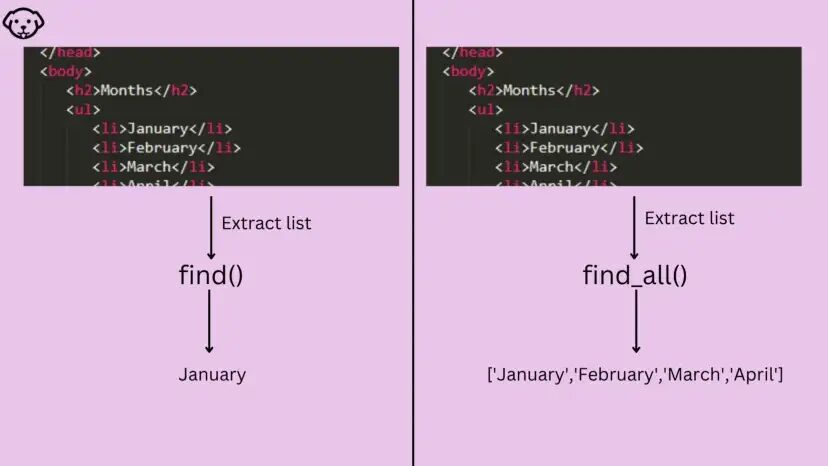

In [3]:
# get all containers that contains the informations of each car
containers = soup.find_all('div', class_ = 'listings-cards__list-item mb-md-3 mb-3')
# length of containers
len(containers)

20


First, we will start with one container and scrape the data. After we generalize the scraping to the other containers by using a for loop. What facilitates the generalization? Is the fact that every container has the same structure in the case of HTML code.


In [4]:
# scrape data from a container (we have the possibility to choose any container we want)
# But we need to make sure the container we choose contain all the informations we need
container = containers[0]
# scrape the car brand, model and the year
gen_inf = container.find('h2', 'listing-card__header__title mb-md-2 mb-0').a.text.strip().split()
# get the brand
brand = gen_inf[0]
# get the model
model = " ".join(gen_inf[1:len(gen_inf)-1])
# get the year
year= gen_inf[-1]
# Scrape the reference, kilometer driven, fuel type and gearbox type
gen_inf1  = container.find_all('li', 'listing-card__attribute list-inline-item')
# get reference
reference = gen_inf1[0].text.split()[-1]
# get kilometer driven
kms_driven = gen_inf1[1].text.replace(' km','')
# get fuel type
fuel_type = gen_inf1[3].text
# get transmission
transmission = gen_inf1[2].text
# scrape the price
price = "".join(container.find('h3', "listing-card__header__price font-weight-bold text-uppercase mb-0").text.strip().split()).replace('FCFA', '')
# print all the infos for the first container


In [5]:
# scrape data from all the containers
data = []
for container in containers:
  try:
    gen_inf = container.find('h2', 'listing-card__header__title mb-md-2 mb-0').a.text.strip().split()
    # get the brand
    brand = gen_inf[0]
    # get the model
    model = " ".join(gen_inf[1:len(gen_inf)-1])
    # get the year
    year= gen_inf[-1]
    # Scrape the reference, kilometer driven, fuel type and gearbox type
    gen_inf1  = container.find_all('li', 'listing-card__attribute list-inline-item')
    # get reference
    reference = gen_inf1[0].text.split()[-1]
    # get kilometer driven
    kms_driven = gen_inf1[1].text.replace(' km','').strip( )
    # get fuel type
    fuel_type = gen_inf1[3].text.strip( )
    # get transmission
    transmission = gen_inf1[2].text.strip()
    # scrape the price
    price = "".join(container.find('h3', "listing-card__header__price font-weight-bold text-uppercase mb-0").text.strip().split()).replace('FCFA', '')
    dic = {
        "brand": brand,
        "model": model,
        "year": year,
        "reference": reference,
        "kms_driven": kms_driven,
        "fuel_type": fuel_type,
        "transmission":transmission,
        "price": price
    }
    data.append(dic)
  except:
    pass

DF = pd.DataFrame(data)

In [6]:
DF.head()

,brand,model,year,reference,kms_driven,fuel_type,transmission,price
0,Toyota,Hi Ace,2010,139889,150000,Diesel,Manuelle,8000000
1,Ford,Fusion,2012,139891,1,Essence,Automatique,1800000
2,Hyundai,Elantra,2017,139888,110,Essence,Automatique,6400000
3,Mazda,3,2018,139882,63000,Essence,Automatique,6600000
4,Kia,Kia-k7,2016,139885,120000,Essence,Automatique,5200000


In [ ]:
# data from the first page


### <font color = 'tomato'> Collect data over multiple pages

In [7]:
# create a empty dataframe df
df = pd.DataFrame()
# loop over pages indexes
for index in range(1, 51):
  url = f'https://dakar-auto.com/senegal/voitures-4?&page={index}'
  # get the html code of the page using the get function requests
  res = get(url)
  # store the html code in a beautifulsoup objet with a html parser (a parser allows to easily navigate through the html code)
  soup = bs(res.content, 'html.parser')
  # get all containers that contains the informations of each car
  containers = soup.find_all('div', class_ = 'listings-cards__list-item mb-md-3 mb-3')
  # scrape data from all the containers
  data = []
  for container in containers:
    try:
      gen_inf = container.find('h2', 'listing-card__header__title mb-md-2 mb-0').a.text.strip().split()
      # get the brand
      brand = gen_inf[0]
      # get the model
      model = " ".join(gen_inf[1:len(gen_inf)-1])
      # get the year
      year= gen_inf[-1]
      # Scrape the reference, kilometer driven, fuel type and gearbox type
      gen_inf1  = container.find_all('li', 'listing-card__attribute list-inline-item')
      # get reference
      reference = gen_inf1[0].text.split()[-1]
      # get kilometer driven
      kms_driven = gen_inf1[1].text.replace(' km','').strip( )
      # get fuel type
      fuel_type = gen_inf1[3].text.strip( )
      # get transmission
      transmission = gen_inf1[2].text.strip()
      # scrape the price
      price = "".join(container.find('h3', "listing-card__header__price font-weight-bold text-uppercase mb-0").text.strip().split()).replace('FCFA', '')
      dic = {
          "brand": brand,
          "model": model,
          "year": year,
          "reference": reference,
          "kms_driven": kms_driven,
          "fuel_type": fuel_type,
          "transmission":transmission,
          "price": price
      }
      data.append(dic)
    except:
      pass

  DF = pd.DataFrame(data)
  df = pd.concat([df, DF], axis = 0).reset_index(drop = True)

In [8]:
# Show the data
df.head()

,brand,model,year,reference,kms_driven,fuel_type,transmission,price
0,Toyota,Hi Ace,2010,139889,150000,Diesel,Manuelle,8000000
1,Ford,Fusion,2012,139891,1,Essence,Automatique,1800000
2,Hyundai,Elantra,2017,139888,110,Essence,Automatique,6400000
3,Mazda,3,2018,139882,63000,Essence,Automatique,6600000
4,Kia,Kia-k7,2016,139885,120000,Essence,Automatique,5200000


In [9]:
# shape
df.shape

(984, 8)

### <font color = 'tomato'> Assignment

In [ ]:
# url
url = 'https://dakar-auto.com/senegal/motos-and-scooters-3?&page=3'
#scrape the following informations:
#brand, model, year,reference, kms driven, adress, price, img_link
# from page 1 to 200
#clean the scraped data